In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2025-09-05 19:42:25.099440: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-05 19:42:25.116607: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757090545.137300   23248 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757090545.144009   23248 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757090545.159861   23248 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
batch_size= 32
img_width= 180
img_height= 180
train_data_path= "/home/rwt/Documents/cellula_cv_internship/Teeth_Dataset/Training"

In [3]:
train_data= tf.keras.utils.image_dataset_from_directory(
    train_data_path,
    batch_size= batch_size,
    image_size= (img_height, img_width),
    validation_split= False
)

Found 3087 files belonging to 7 classes.


2025-09-05 19:43:52.631844: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-09-05 19:43:52.631874: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-09-05 19:43:52.631878: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: rwt-Cyborg-15-A13UDX
2025-09-05 19:43:52.631882: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: rwt-Cyborg-15-A13UDX
2025-09-05 19:43:52.632034: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 550.163.1
2025-09-05 19:43:52.632050: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:201] kernel reported v

In [4]:
test_data_path="/home/rwt/Documents/cellula_cv_internship/Teeth_Dataset/Testing"
val_data_path="/home/rwt/Documents/cellula_cv_internship/Teeth_Dataset/Validation"

In [5]:
classnames= train_data.class_names
print(classnames)

['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


In [6]:
val_data= tf.keras.utils.image_dataset_from_directory(
    val_data_path,
    batch_size= batch_size,
    image_size= (img_height, img_width),
    validation_split= False

)

Found 1028 files belonging to 7 classes.


In [24]:
test_data2 = tf.keras.utils.image_dataset_from_directory(
    test_data_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    labels="inferred",
    label_mode="int",
    class_names=['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']  # force only 7
)


Found 1028 files belonging to 7 classes.


2025-09-05 21:14:55.828846: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


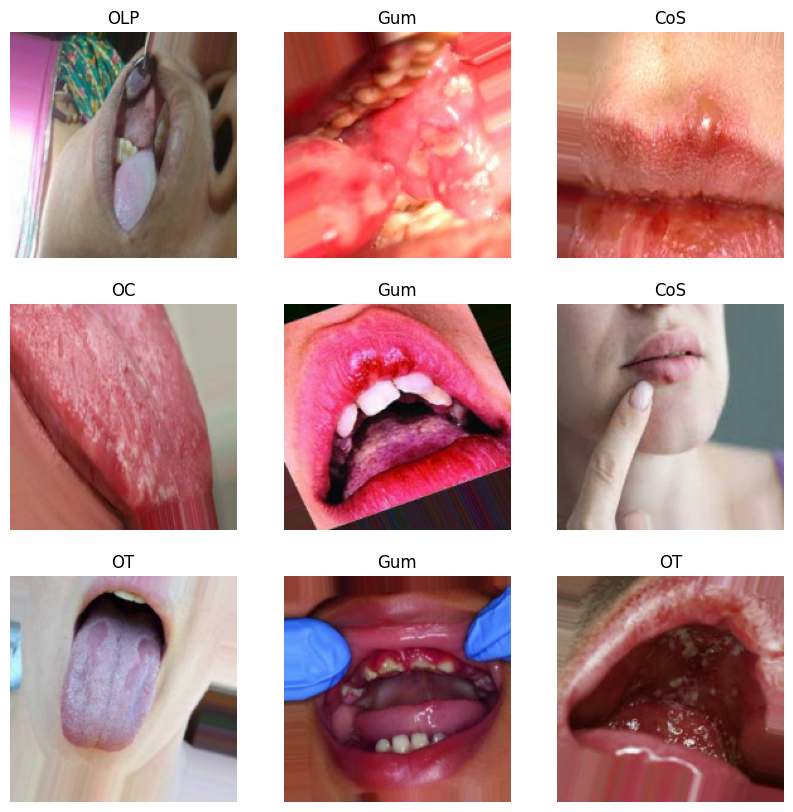

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_data.class_names[labels[i]])
    plt.axis("off")


In [13]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [10]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomTranslation(0.1, 0.1),
])

In [ ]:

AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)


In [25]:
test_data2 = test_data2.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:

num_classes=7

model = Sequential([
  data_augmentation,  
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

/home/rwt/Documents/myenv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=25
)

Epoch 1/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 386ms/step - accuracy: 0.1949 - loss: 2.0922 - val_accuracy: 0.3278 - val_loss: 1.7334
Epoch 2/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 35s 365ms/step - accuracy: 0.3134 - loss: 1.7407 - val_accuracy: 0.3881 - val_loss: 1.5822
Epoch 3/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 37s 380ms/step - accuracy: 0.3867 - loss: 1.6051 - val_accuracy: 0.4416 - val_loss: 1.4436
Epoch 4/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 38s 389ms/step - accuracy: 0.4331 - loss: 1.4858 - val_accuracy: 0.4912 - val_loss: 1.3897
Epoch 5/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 37s 385ms/step - accuracy: 0.4531 - loss: 1.4312 - val_accuracy: 0.5292 - val_loss: 1.2653
Epoch 6/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 37s 377ms/step - accuracy: 0.4973 - loss: 1.3259 - val_accuracy: 0.5982 - val_loss: 1.1502
Epoch 7/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 31s 315ms/step - accuracy: 0.5367 - loss: 1.2262 - val_accuracy: 0.5914 - val_loss: 1.0877
Epoch 8/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 31s 318ms/step - accuracy: 0.5537 - loss: 1.1843 - val_accu

In [26]:
test_loss, test_acc = model.evaluate(test_data2)
print("Test Accuracy:", test_acc)

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7935 - loss: 0.5700
Test Accuracy: 0.7801556587219238
